In [77]:
import pandas as pd
A=pd.read_csv("C:/Users/tpasv/Desktop/Data Science/Data Science/Dataset/Electric_Production.csv")

In [78]:
A.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [79]:
A.Date=pd.to_datetime(A.DATE,format="%d-%m-%Y")

<ipython-input-79-f21ec31e4ed4>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.Date=pd.to_datetime(A.DATE,format="%d-%m-%Y")


In [80]:
A.index=A.Date

In [81]:
A=A.drop(labels=["DATE"],axis=1)

<AxesSubplot:xlabel='DATE'>

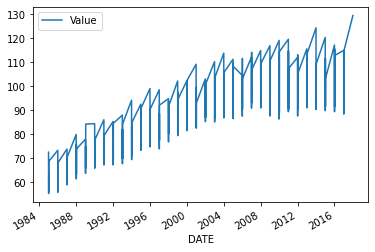

In [82]:
A.plot()

In [83]:
A

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151
...,...
2017-01-09,98.6154
2017-01-10,93.6137
2017-01-11,97.3359


<ipython-input-84-02ea7f7d36ab>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  fig = seasonal_decompose(A,model="multiplicative",freq=30)


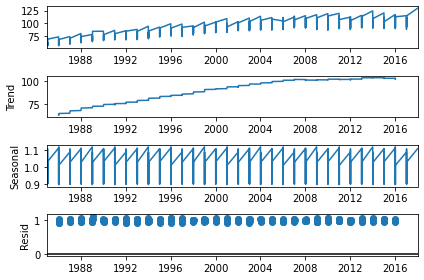

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
fig = seasonal_decompose(A,model="multiplicative",freq=30)
fig.plot()
plt.show()

In [85]:
import numpy as np
log_pass = np.log(A[["Value"]])
rm = log_pass.rolling(window=12).mean()
A['diff']=log_pass-rm

In [86]:
B = A[A['diff'].isnull()==False]

In [87]:
B=B.drop(labels=["Value"],axis=1)

In [88]:
B.columns=["Values"]

In [89]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B['Values']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Stationary


In [ ]:
trd = B[B.index.year<=2004]
tsd = B[B.index>2004]
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="2005-01-01",end="2006-12-01")